# Naive Bayes Model

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("kidney_Disease_Pre_processed.csv")
df.head(20)

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0,40,3,3,1,0,0,0,1,1,...,32,36,31,0,0,1,1,1,1,0
1,1,5,0,3,4,0,0,0,1,1,...,26,20,0,1,1,1,1,1,1,0
2,2,54,3,1,2,3,0,0,1,1,...,19,34,0,1,0,1,0,1,0,0
3,3,40,2,0,4,0,0,1,0,1,...,20,26,18,0,1,1,0,0,0,0
4,4,43,3,1,2,0,0,0,1,1,...,23,32,25,1,1,1,1,1,1,0
5,5,52,4,2,3,0,0,0,1,1,...,27,36,23,0,0,1,1,0,1,0
6,6,60,2,1,0,0,0,0,1,1,...,24,0,0,1,1,1,1,1,1,0
7,7,17,3,2,2,4,0,1,1,1,...,32,28,29,1,0,1,1,0,1,0
8,8,44,5,2,3,0,0,1,0,1,...,21,52,19,0,0,1,1,1,0,0
9,9,45,4,3,2,0,1,1,0,1,...,17,71,16,0,0,1,0,1,0,0


In [16]:
x = df.drop('class',axis='columns')
y = df['class']
x

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,0,40,3,3,1,0,0,0,1,1,...,90,32,36,31,0,0,1,1,1,1
1,1,5,0,3,4,0,0,0,1,1,...,49,26,20,0,1,1,1,1,1,1
2,2,54,3,1,2,3,0,0,1,1,...,32,19,34,0,1,0,1,0,1,0
3,3,40,2,0,4,0,0,1,0,1,...,48,20,26,18,0,1,1,0,0,0
4,4,43,3,1,2,0,0,0,1,1,...,52,23,32,25,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,0,0,1,1,...,93,35,26,28,1,1,1,1,1,1
396,396,34,2,4,0,0,0,0,1,1,...,101,42,36,41,1,1,1,1,1,1
397,397,8,3,3,0,0,0,0,1,1,...,94,37,25,33,1,1,1,1,1,1
398,398,11,1,4,0,0,0,0,1,1,...,78,39,31,38,1,1,1,1,1,1


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

# Train and Predict

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [19]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [20]:
len(x_train)

320

In [21]:
len(x_test)

80

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [23]:
model.fit(x_train,y_train)

GaussianNB()

In [24]:
model.score(x_test,y_test)

0.95

In [25]:
y_test[:10]

157    0
264    1
108    0
291    1
15     0
168    0
208    0
19     0
304    1
4      0
Name: class, dtype: int64

In [26]:
model.predict(x_test[:10])

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

# GridSearchCV for Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer


model = GaussianNB()

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# params_NB = {
#     "priors":[0.2,0.9] ,
#     "var_smoothing": np.logspace(0,-9, num=100)
# }



#cv_scores = cross_val_score(model, X, Y, cv=5)

gridcv_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')


Data_transformed = PowerTransformer().fit_transform(x_test)

gridcv_NB.fit(Data_transformed, y_test);


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [61]:
gridcv_NB.best_params_


{'var_smoothing': 0.23101297000831597}

In [62]:
gridcv_NB.best_score_


0.975

# Exhaustive Grid Search CV for SVC

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    "gamma": [0.1, 1.0, 10, 100],
    "C": [0.1,1.0,10,100],
    "kernel": ['rbf','linear']
}

clf = GridSearchCV(SVC(), param_grid, cv=5, verbose=2 )
clf.fit(x_train,y_train)
clf.cv_results_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.

[CV] END .........................C=10, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .........................C=10, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=10, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=10, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=10, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=10, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=10, kernel=linear; total time=   0.0s
[CV] END ........................C=10, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ...................

{'mean_fit_time': array([0.02028661, 0.00409884, 0.0109417 , 0.00404396, 0.01117911,
        0.00501819, 0.01150246, 0.00522065, 0.01330242, 0.00486164,
        0.0132494 , 0.00538363, 0.01308646, 0.00442243, 0.01291275,
        0.00461383, 0.01281042, 0.0046206 , 0.01192298, 0.00476975,
        0.01279674, 0.00517921, 0.01267014, 0.00557709, 0.01535282,
        0.00505385, 0.01408334, 0.0047523 , 0.01309175, 0.00489388,
        0.01261497, 0.00487776]),
 'std_fit_time': array([1.89785263e-02, 1.95979921e-04, 1.05072677e-03, 9.16133868e-05,
        1.88556596e-03, 4.88944981e-04, 4.59639422e-04, 7.23954158e-04,
        8.43759823e-04, 4.05054246e-04, 1.53950996e-03, 9.02584910e-04,
        2.12816313e-03, 6.82188427e-04, 1.47916238e-03, 2.69267516e-04,
        2.30090576e-04, 3.99271342e-04, 8.69870930e-04, 7.84271172e-04,
        9.51611847e-04, 5.80642248e-04, 8.10459802e-04, 1.34507314e-03,
        2.58862754e-03, 9.00346626e-04, 3.10905396e-03, 3.79004908e-04,
        6.41795968e-0

In [31]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020287,0.018979,0.005047,0.000333,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.609375,0.609375,0.625,0.625,0.625000,0.618750,0.007655,17
1,0.004099,0.000196,0.002617,0.000070,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",1.000000,1.000000,1.000,1.000,0.984375,0.996875,0.006250,1
2,0.010942,0.001051,0.005753,0.001259,0.1,1.0,rbf,"{'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}",0.609375,0.609375,0.625,0.625,0.625000,0.618750,0.007655,17
3,0.004044,0.000092,0.002739,0.000162,0.1,1.0,linear,"{'C': 0.1, 'gamma': 1.0, 'kernel': 'linear'}",1.000000,1.000000,1.000,1.000,0.984375,0.996875,0.006250,1
4,0.011179,0.001886,0.005192,0.000678,0.1,10,rbf,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",0.609375,0.609375,0.625,0.625,0.625000,0.618750,0.007655,17
5,0.005018,0.000489,0.003994,0.001201,0.1,10,linear,"{'C': 0.1, 'gamma': 10, 'kernel': 'linear'}",1.000000,1.000000,1.000,1.000,0.984375,0.996875,0.006250,1
6,0.011502,0.000460,0.005497,0.000454,0.1,100,rbf,"{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}",0.609375,0.609375,0.625,0.625,0.625000,0.618750,0.007655,17
7,0.005221,0.000724,0.003537,0.000765,0.1,100,linear,"{'C': 0.1, 'gamma': 100, 'kernel': 'linear'}",1.000000,1.000000,1.000,1.000,0.984375,0.996875,0.006250,1
8,0.013302,0.000844,0.006651,0.000906,1.0,0.1,rbf,"{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}",0.609375,0.609375,0.625,0.625,0.625000,0.618750,0.007655,17
9,0.004862,0.000405,0.002976,0.000407,1.0,0.1,linear,"{'C': 1.0, 'gamma': 0.1, 'kernel': 'linear'}",1.000000,1.000000,1.000,1.000,0.984375,0.996875,0.006250,1


In [32]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,0.1,rbf,0.618750
1,0.1,linear,0.996875
2,0.1,rbf,0.618750
3,0.1,linear,0.996875
4,0.1,rbf,0.618750
5,0.1,linear,0.996875
6,0.1,rbf,0.618750
7,0.1,linear,0.996875
8,1.0,rbf,0.618750
9,1.0,linear,0.996875


In [54]:

print("Best params:",clf.best_params_)

print("Best score:",clf.best_score_)

print("Best score for train:",clf.score(x_train, y_train))

print("Best score test:",clf.score(x_test, y_test))


Best params: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best score: 0.996875
Best score for train: 1.0
Best score test: 1.0


In [33]:
clf.best_params_


{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [34]:
clf.best_score_

0.996875

In [35]:
clf.score(x_train, y_train)

1.0

In [36]:
clf.score(x_test, y_test)

1.0

In [55]:

print("Best params:",clf.best_params_)

print("Best score:",clf.best_score_)

print("Best score for train:",clf.score(x_train, y_train))

print("Best score test:",clf.score(x_test, y_test))


Best params: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best score: 0.996875
Best score for train: 1.0
Best score test: 1.0


# Randomized Hyperparameter Search for SVC

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    SVC()
)

In [38]:

param_grid = {
    "svc__gamma": [0.1, 1.0, 10, 100],
    "svc__C": [0.1, 1.0, 10, 100],
}

In [39]:
from sklearn.model_selection import RandomizedSearchCV


random_search = RandomizedSearchCV(pipe, param_grid, cv=5, n_iter=5)
random_search.fit(x_train, y_train);

In [40]:
random_search.score(x_test, y_test)

0.775

In [41]:
clf.score(x_test, y_test)

1.0

In [42]:
random_search.score(x_train, y_train)

1.0

# AdaBoost Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

adaclf = AdaBoostClassifier(n_estimators=70, learning_rate=.6, random_state=0)
model = adaclf.fit(x_train,y_train)


y_pred = model.predict(x_train)
print("Accuracy of train: ",accuracy_score(y_train, y_pred))

y_pred = model.predict(x_test)
print("Accuracy of test: ",accuracy_score(y_test, y_pred))



Accuracy of train:  1.0
Accuracy of test:  1.0


# Adaboost with SVC base estimator

In [44]:
# base_estimator is the learning algorithm to use to train the weak models. 
# This will almost always not needed to be changed because by far the most common learner to use 
# with AdaBoost is a decision tree – this parameter’s default argument.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc=SVC(probability=True, kernel='linear')

ada2=AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=.1, random_state=0)
model2 = ada2.fit(x_train,y_train)


y_pred = model2.predict(x_train)
print("Accuracy of train: ",accuracy_score(y_train, y_pred))

y_pred = model2.predict(x_test)
print("Accuracy of test: ",accuracy_score(y_test, y_pred))



Accuracy of train:  1.0
Accuracy of test:  1.0


#  AdaBoost with SVC Grid Search

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

svc=SVC(probability=True, kernel='linear')

ada_model = AdaBoostClassifier(base_estimator=svc)


parameters = {
    'n_estimators':[10,50,250,1000],
    'learning_rate':[0.01,0.1,0.15,0.2],
    #'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    #'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    #'algorithm': ['SAMME', 'SAMME.R']
}

ada_grid_search = GridSearchCV(ada_model, parameters,scoring='accuracy',n_jobs=-1)
ada_grid_search.fit(x_train,y_train)


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=SVC(kernel='linear',
                                                             probability=True)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='accuracy')

In [46]:
print("Best params:",ada_grid_search.best_params_)

print("Best score:",ada_grid_search.best_score_)

print("Best score for train:",ada_grid_search.score(x_train, y_train))

print("Best test:",ada_grid_search.score(x_test, y_test))


Best params: {'learning_rate': 0.15, 'n_estimators': 250}
Best score: 0.996875
Best score for train: 1.0
Best test: 1.0


# AdaBoost Classifier with Decision Tree base estimator and GridSearchCV

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV


ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {
    'base_estimator__max_depth':[i for i in range(2,11,2)],
    'base_estimator__min_samples_leaf':[5,10],
    'n_estimators':[10,50,250,1000],
    'learning_rate':[0.01,0.1,0.15,0.2],
    #'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    #'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    #'algorithm': ['SAMME', 'SAMME.R']
}

ada_grid_searchdt = GridSearchCV(ada_model, parameters,scoring='accuracy',n_jobs=-1)
ada_grid_searchdt.fit(x_train,y_train)


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8, 10],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1, 0.15, 0.2],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='accuracy')

In [48]:
print("Best params:",ada_grid_search.best_params_)

print("Best score:",ada_grid_search.best_score_)

print("Best score for train:",ada_grid_search.score(x_train, y_train))

print("Best test:",ada_grid_search.score(x_test, y_test))


Best params: {'learning_rate': 0.15, 'n_estimators': 250}
Best score: 0.996875
Best score for train: 1.0
Best test: 1.0


#  AdaBoost with Naive Bayes and Grid Search

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# model = GaussianNB()

ada_model = AdaBoostClassifier(base_estimator=GaussianNB())

parameters = {
    'n_estimators':[10,50,250,1000],
    'learning_rate':[0.01,0.1,0.15,0.2]
}

ada_grid_search = GridSearchCV(ada_model, parameters,verbose=3,scoring='accuracy',n_jobs=-1)
ada_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=GaussianNB()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='accuracy', verbose=3)

In [50]:
print("Best params:",ada_grid_search.best_params_)

print("Best score:",ada_grid_search.best_score_)

print("Best score for train:",ada_grid_search.score(x_train, y_train))

print("Best test:",ada_grid_search.score(x_test, y_test))


Best params: {'learning_rate': 0.15, 'n_estimators': 10}
Best score: 0.99375
Best score for train: 1.0
Best test: 0.9875


# Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix
y_pre=ada_grid_searchdt.predict(x_test)
cm = confusion_matrix(y_test, y_pre)
cm

array([[52,  0],
       [ 0, 28]])

Text(70.72222222222221, 0.5, 'Truth')

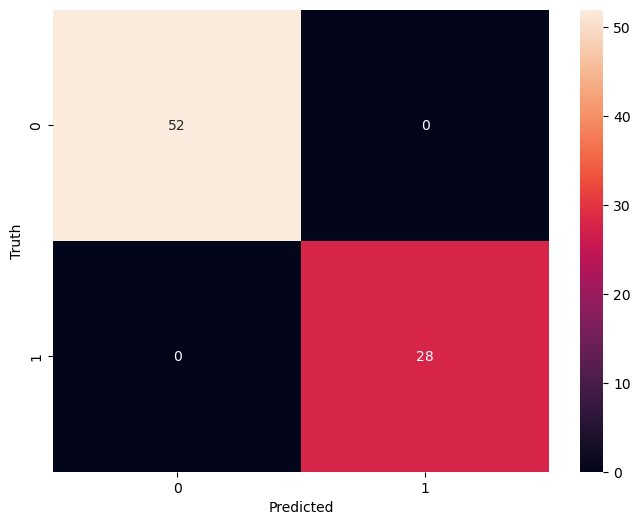

[CV 1/5] END learning_rate=0.01, n_estimators=10;, score=0.969 total time=   0.1s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=1.000 total time=   0.3s
[CV 5/5] END learning_rate=0.01, n_estimators=250;, score=0.969 total time=   0.3s
[CV 1/5] END learning_rate=0.01, n_estimators=1000;, score=0.984 total time=   0.3s
[CV 1/5] END learning_rate=0.1, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/5] END learning_rate=0.1, n_estimators=10;, score=1.000 total time=   0.1s
[CV 5/5] END learning_rate=0.1, n_estimators=10;, score=0.969 total time=   0.1s
[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=1.000 total time=   0.2s
[CV 5/5] END learning_rate=0.1, n_estimators=250;, score=0.969 total time=   0.0s
[CV 1/5] END learning_rate=0.1, n_estimators=1000;, score=1.000 total time=   0.2s
[CV 4/5] END learning_rate=0.15, n_estimators=50;, score=0.984 total time=   0.2s
[CV 5/5] END learning_rate=0.15, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END lea

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')